In [1]:
import pandas as pd
import random

def generate_row():
    location = random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur","Nagpur"])
    size = random.randint(50, 200)
    rooms = random.randint(1, 5)
    amenities = ", ".join(random.sample(["Gym", "Pool", "Garden", "Parking", "AC"], random.randint(1, 3)))

    # Calculate price based on rooms and amenities
    base_price = 100000  # Base price for a 1-room house with no amenities
    price_per_room = 50000
    price_per_amenity = 20000

    price = base_price + (rooms - 1) * price_per_room + len(amenities.split(", ")) * price_per_amenity

    return [location, size, rooms, amenities, price]

data = [generate_row() for _ in range(300)]


In [4]:
df = pd.DataFrame(data, columns=["Location", "Size (sqft)", "Number of Rooms", "Amenities", "Price"])

df.to_csv("house_data.csv")
df

,Location,Size (sqft),Number of Rooms,Amenities,Price
0,Mumbai,80,4,"Pool, AC, Parking",310000
1,Pune,56,5,"AC, Garden, Parking",360000
2,Nashik,143,5,"Garden, Pool",340000
3,Nashik,77,4,"Garden, AC",290000
4,Kolhapur,108,2,"AC, Pool, Garden",210000
...,...,...,...,...,...
295,Kolhapur,69,3,Gym,220000
296,Nagpur,51,1,"Garden, AC",140000
297,Mumbai,92,5,"Garden, Gym, Pool",360000
298,Nagpur,171,5,"Garden, AC",340000


In [5]:
df.shape

(300, 5)

In [6]:
df.describe(include="all")

,Location,Size (sqft),Number of Rooms,Amenities,Price
count,300,300.000000,300.000000,300,300.000000
unique,5,NaN,NaN,75,NaN
top,Nashik,NaN,NaN,Parking,NaN
freq,65,NaN,NaN,23,NaN
mean,NaN,124.030000,2.950000,NaN,238900.000000
std,NaN,44.196912,1.393067,NaN,71807.458086
min,NaN,50.000000,1.000000,NaN,120000.000000
25%,NaN,87.000000,2.000000,NaN,185000.000000
50%,NaN,121.000000,3.000000,NaN,240000.000000
75%,NaN,164.250000,4.000000,NaN,310000.000000


In [7]:
df.isnull().sum()

Location           0
Size (sqft)        0
Number of Rooms    0
Amenities          0
Price              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         300 non-null    object
 1   Size (sqft)      300 non-null    int64 
 2   Number of Rooms  300 non-null    int64 
 3   Amenities        300 non-null    object
 4   Price            300 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.8+ KB


<Axes: >

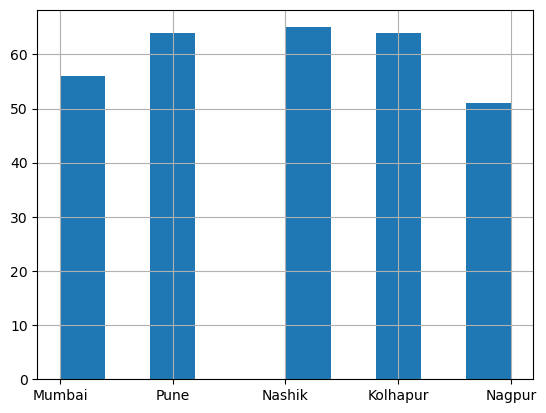

In [11]:
import matplotlib.pyplot as plt
df['Location'].hist()

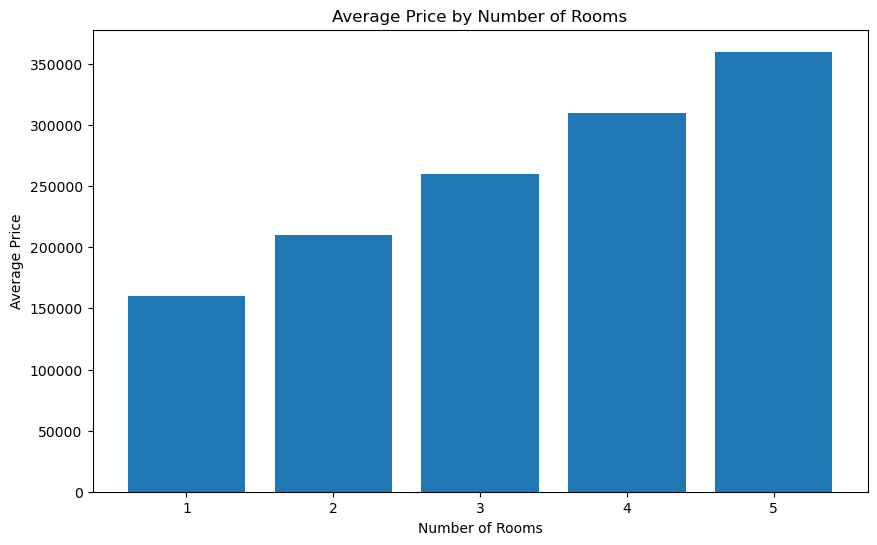

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(df['Number of Rooms'], df['Price'])

plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Rooms')


plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
cols = ['Location','Amenities']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

df

,Location,Size (sqft),Number of Rooms,Amenities,Price
0,1,80,4,66,310000
1,4,56,5,3,360000
2,3,143,5,27,340000
3,3,77,4,18,290000
4,0,108,2,14,210000
...,...,...,...,...,...
295,0,69,3,31,220000
296,2,51,1,18,140000
297,1,92,5,23,360000
298,2,171,5,18,340000


In [15]:
X = df.drop('Price', axis=1)
y = df['Price']

In [18]:
X

,Location,Size (sqft),Number of Rooms,Amenities
0,1,80,4,66
1,4,56,5,3
2,3,143,5,27
3,3,77,4,18
4,0,108,2,14
...,...,...,...,...
295,0,69,3,31
296,2,51,1,18
297,1,92,5,23
298,2,171,5,18


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# Initialize model
lr = LinearRegression()

# Fit model
LR_model = lr.fit(X_train, y_train)
LR_model

LinearRegression()

In [26]:
y_pred = LR_model.predict(X_test).round()

In [27]:
df = pd.DataFrame({
              'Price':y_test,
              'Predictions':y_pred})
df

,Price,Predictions
203,260000,244675.0
266,160000,141204.0
152,190000,192982.0
9,270000,293972.0
233,270000,292066.0
226,220000,239568.0
196,320000,340739.0
109,260000,239455.0
5,220000,246674.0
175,170000,189752.0
